<h1>Problem 2. Train a machine learning model using the training file to predict the values of the ‘tat_in_days’ column for the test file. ( Evaluation on the basis on RMSE score)
</h1>

In [2332]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import cv2

In [2333]:
train_data=pd.read_csv('problem_2_train.csv',parse_dates=['memcreateddate','mobilepurchasedate','claimintdate','pickupStartdate'])
#df=train_data.groupby('Dataset').describe()
train_data.head(10)

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,2851218,AN,7,500004,233,233,131,A,ADLD,500001,2017-04-27,2016-12-02,2018-02-08,4403,2018-02-13,5
1,2838330,AJ,10,226010,233,233,131,A,ADLD,226022,2017-03-06,2017-03-05,2018-02-04,4444,2018-02-08,12
2,2835781,AJ,2,110018,233,233,228,A,ADLD,110018,2018-02-01,2018-01-27,2018-02-03,4388,2018-02-12,9
3,2838589,AM,2,110018,233,233,228,B,ADLD,124001,2018-01-17,2018-01-31,2018-02-04,4092,2018-02-14,9
4,2855214,AN,21,110015,233,233,131,A,ADLD,201301,2018-01-23,2018-01-20,2018-02-09,4580,2018-02-14,8
5,2852784,AN,21,110015,233,233,131,B,ADLD,132001,2017-12-22,2017-12-17,2018-02-08,4580,2018-02-15,9
6,2844713,C,2,110018,233,233,131,A,ADLD,110059,2017-08-26,2017-08-22,2018-02-06,4094,2018-02-09,15
7,2829719,C,6,160059,233,233,131,B,ADLD,151001,2017-03-14,2017-03-13,2018-02-01,4549,2018-02-10,16
8,2833619,AN,3,560011,201,233,131,A,ADLD,560076,2017-07-23,2017-07-22,2018-02-03,4467,2018-02-08,17
9,2870579,AJ,5,380009,233,233,131,B,ADLD,390006,2017-06-01,2017-05-31,2018-02-14,4422,2018-02-20,11


<h1> The problem is Regression problem because the data of dependent variable i.e 'tat' is continuous </h1>

<h2> First of all ,checking for outliers </h2>

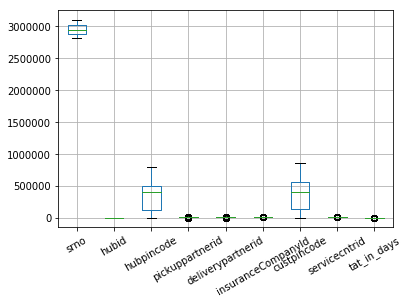

In [2334]:
train_data.boxplot()

plt.xticks(rotation=30)
plt.show()

<h2> No outliers in the data </h2>

<h3> Cleaning the data.....Handling categorical data (Replacing existing categorical columns)</h3>

In [2335]:
mob_arr=train_data.mobmake.unique()

In [2336]:
mob_list=list(mob_arr)
len_mob=len(mob_list)
len_mob

38

In [2337]:
mob_dict={}

for i in range(0,len_mob):
    mob_dict[mob_arr[i]]=i


In [2338]:
train_data['mobmake']=train_data.mobmake.map(mob_dict)


In [2339]:
train_data.custpincodecategory.unique()

array(['A', 'B', 'C', '0', 'D'], dtype=object)

In [2340]:
train_data.claimtype.unique()

array(['ADLD', 'EW'], dtype=object)

In [2341]:
train_data['custpincodecategory']=train_data.custpincodecategory.map({'0':0,'A':1,'B':2,'C':3,'D':4})

In [2342]:
train_data['claimtype']=train_data.claimtype.map({'ADLD':1,'EW':2})

In [2343]:
type(train_data['mobilepurchasedate'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [2344]:
train_data.columns

Index(['srno', 'mobmake', 'hubid', 'hubpincode', 'pickuppartnerid',
       'deliverypartnerid', 'insuranceCompanyId', 'custpincodecategory',
       'claimtype', 'custpincode', 'memcreateddate', 'mobilepurchasedate',
       'claimintdate', 'servicecntrid', 'pickupStartdate', 'tat_in_days'],
      dtype='object')

In [2345]:
#train_data.drop(['srno','hubid','custpincodecategory'],axis=1,inplace=True)

In [2346]:
train_data['mobilepurchase_date']=train_data.mobilepurchasedate.dt.day
train_data['mobilepurchase_month']=train_data.mobilepurchasedate.dt.month
train_data['mobilepurchase_year']=train_data.mobilepurchasedate.dt.year
#train_data['mobilepurchasedate']

In [2347]:
train_data['claimint_date']=train_data.claimintdate.dt.day
train_data['claimint_month']=train_data.claimintdate.dt.month
train_data['claimint_year']=train_data.claimintdate.dt.year

In [2348]:
train_data['pickupStart_date']=train_data.pickupStartdate.dt.day
train_data['pickupStart_month']=train_data.pickupStartdate.dt.month
train_data['pickupStart_year']=train_data.pickupStartdate.dt.year


train_data['memcreated_date']=train_data.memcreateddate.dt.day
train_data['memcreated_month']=train_data.memcreateddate.dt.month
train_data['memcreated_year']=train_data.memcreateddate.dt.year
train_data['diff_date']=train_data['pickupStart_date']-train_data['claimint_date']

In [2349]:
#train_data.groupby('tat_in_days').describe
#train_data.query('claimtype==1')
#train_data.drop(['pickuppartnerid','deliverypartnerid','claimtype','srno'],axis=1,inplace=True)
# train_data.drop('deliverypartnerid',axis=1)
# train_data.drop('claimtype',axis=1)
# train_data.drop('srno',axis=1)


In [2350]:
# dataset=train_data.sort_values('mobmake')

# dataset.shape
train_data.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,...,claimint_date,claimint_month,claimint_year,pickupStart_date,pickupStart_month,pickupStart_year,memcreated_date,memcreated_month,memcreated_year,diff_date
0,2851218,0,7,500004,233,233,131,1,1,500001,...,8,2,2018,13,2,2018,27,4,2017,5
1,2838330,1,10,226010,233,233,131,1,1,226022,...,4,2,2018,8,2,2018,6,3,2017,4
2,2835781,1,2,110018,233,233,228,1,1,110018,...,3,2,2018,12,2,2018,1,2,2018,9
3,2838589,2,2,110018,233,233,228,2,1,124001,...,4,2,2018,14,2,2018,17,1,2018,10
4,2855214,0,21,110015,233,233,131,1,1,201301,...,9,2,2018,14,2,2018,23,1,2018,5


<h3> Heatmap </h3>

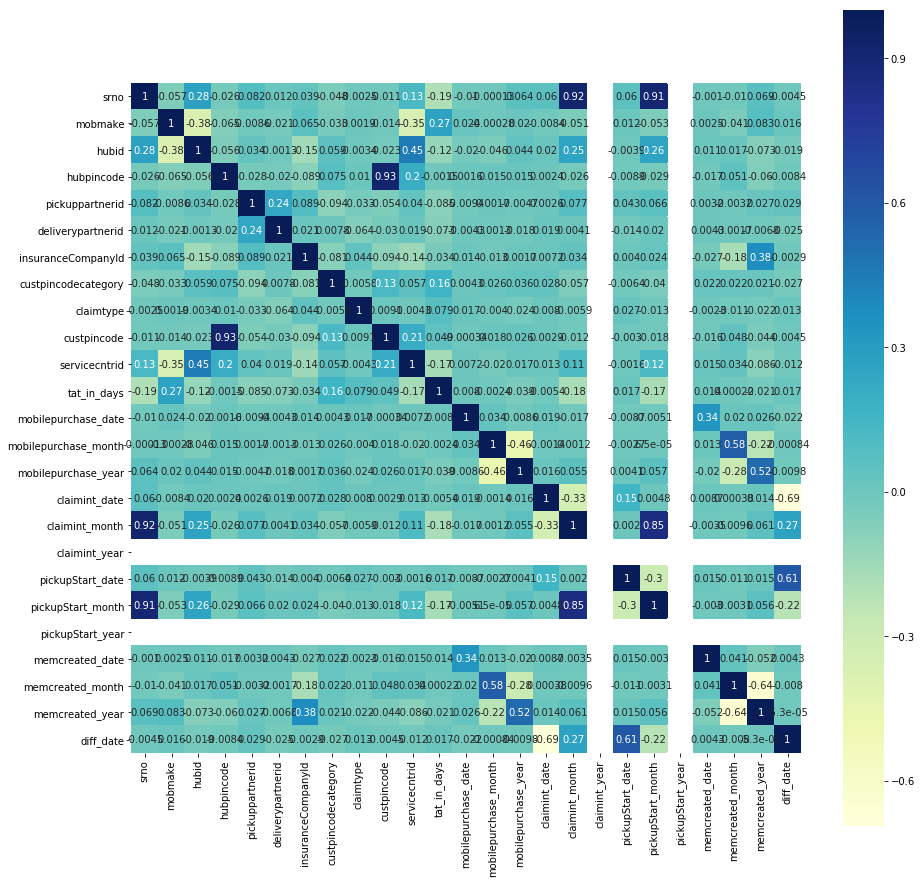

In [2351]:
fig,ax=plt.subplots(figsize=(15,15))
correlations=train_data.corr()
sb.heatmap(correlations,square=True,cmap="YlGnBu",annot=True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [2352]:
#sb.pairplot(train_data)

<h2> Choosing the featured cols (from independent cols) </h2>

In [2353]:
#X=train_data.iloc[:,0:15]  4.90
# feature_cols=[ 'mobmake', 'insuranceCompanyId', 'custpincodecategory','claimtype', 'custpincode',
#          'memcreateddate', 'mobilepurchasedate',
#        'claimintdate',  'pickupStartdate']
# feature_cols   #best 1.24

# feature_cols=[ 'mobmake', 'insuranceCompanyId', 'custpincodecategory','claimtype',
#           'mobilepurchasedate',
#        'claimintdate',  'pickupStartdate','diff_date']
# feature_cols

# feature_cols=[ 'mobmake', 'insuranceCompanyId', 'custpincodecategory','claimtype', 'custpincode', 'mobilepurchase_date', 'mobilepurchase_month', 'mobilepurchase_year',
# 'claimint_date', 'claimint_month', 'claimint_year', 'memcreated_date',
# 'memcreated_month', 'memcreated_year']

# feature_cols=['srno', 'mobmake', 'hubid', 'hubpincode', 'custpincodecategory',
#       'claimtype', 'custpincode', 'servicecntrid','mobilepurchase_date','claimint_date', 'memcreated_date','pickupStart_date','diff_date']
    
feature_cols=['mobmake', 'custpincodecategory','pickuppartnerid','deliverypartnerid',
        'custpincode', 'mobilepurchase_date', 'mobilepurchase_month', 'mobilepurchase_year',
       'claimint_date', 'claimint_month', 'claimint_year', 'pickupStart_date',
       'pickupStart_month', 'memcreated_date',
       'memcreated_month']

In [2354]:
train_data.columns

Index(['srno', 'mobmake', 'hubid', 'hubpincode', 'pickuppartnerid',
       'deliverypartnerid', 'insuranceCompanyId', 'custpincodecategory',
       'claimtype', 'custpincode', 'memcreateddate', 'mobilepurchasedate',
       'claimintdate', 'servicecntrid', 'pickupStartdate', 'tat_in_days',
       'mobilepurchase_date', 'mobilepurchase_month', 'mobilepurchase_year',
       'claimint_date', 'claimint_month', 'claimint_year', 'pickupStart_date',
       'pickupStart_month', 'pickupStart_year', 'memcreated_date',
       'memcreated_month', 'memcreated_year', 'diff_date'],
      dtype='object')

In [2355]:
#type(train_data.diff_date[0])

In [2356]:
X=train_data[feature_cols]
#X  
X.head()         # Independent variables

,mobmake,custpincodecategory,pickuppartnerid,deliverypartnerid,custpincode,mobilepurchase_date,mobilepurchase_month,mobilepurchase_year,claimint_date,claimint_month,claimint_year,pickupStart_date,pickupStart_month,memcreated_date,memcreated_month
0,0,1,233,233,500001,2,12,2016,8,2,2018,13,2,27,4
1,1,1,233,233,226022,5,3,2017,4,2,2018,8,2,6,3
2,1,1,233,233,110018,27,1,2018,3,2,2018,12,2,1,2
3,2,2,233,233,124001,31,1,2018,4,2,2018,14,2,17,1
4,0,1,233,233,201301,20,1,2018,9,2,2018,14,2,23,1


In [2357]:
y=train_data['tat_in_days']   
#y# dependent variable
#train_data

In [2358]:
#train_data.groupby('mobmake').describe()

In [2359]:
X.shape

(6250, 15)

In [2360]:
y.shape

(6250,)

<h2>Now Training the data using Linear Regression Algorithm </h2>

In [2361]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics


In [2362]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=20,test_size=0.25) # ratio of training and testing data is 75:25

In [2363]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4687, 15)
(4687,)
(1563, 15)
(1563,)


In [2364]:
lnreg=LinearRegression()
lnreg.fit(X_train,y_train)
y_pred=lnreg.predict(X_test)
# for i in y_pred:
#     print(i)

In [2365]:
lnreg.intercept_

1132.9086719680604

In [2366]:
lnreg.coef_

array([ 2.78585761e-01,  9.72382655e-01, -7.36888934e-03, -1.29173952e-02,
        7.98534999e-07, -4.39279890e-03, -7.00039769e-02, -5.52673781e-01,
       -8.36877613e-02, -2.80870044e+00, -4.44089210e-16,  7.14036863e-02,
        1.67857539e+00,  8.93451588e-03,  1.43677631e-02])

In [2367]:
list(zip(feature_cols,lnreg.coef_))  

[('mobmake', 0.2785857606714526),
 ('custpincodecategory', 0.9723826551609638),
 ('pickuppartnerid', -0.007368889343231719),
 ('deliverypartnerid', -0.012917395159226734),
 ('custpincode', 7.985349986805446e-07),
 ('mobilepurchase_date', -0.00439279890433114),
 ('mobilepurchase_month', -0.07000397685987597),
 ('mobilepurchase_year', -0.5526737810064718),
 ('claimint_date', -0.08368776126469142),
 ('claimint_month', -2.808700438794527),
 ('claimint_year', -4.440892098500626e-16),
 ('pickupStart_date', 0.07140368630054099),
 ('pickupStart_month', 1.6785753917366282),
 ('memcreated_date', 0.008934515879252158),
 ('memcreated_month', 0.014367763138365647)]

In [2368]:
# plt.scatter(y_test, y_pred,  color='black')
# plt.plot(y_test,y_pred, color='blue', linewidth=3)
# plt.title("Linear Regression Graph")
# plt.xlabel("Testing Dataset")
# plt.ylabel("Predicted Dataset")
# plt.show()

<h2> Calculating Root Mean Square Error(RMSE) </h2>

In [2369]:
#y_test

In [2370]:
rmse=np.sqrt(((y_test - y_pred) ** 2).mean())
# rmse=metrics.mean_squared_error(y_test,y_pred)
rmse

4.547025712257906

In [2371]:
lnreg.score(X_test,y_test)

0.16014798894442406

<h1> Testing data(from test.csv) </h1>

In [2372]:
test_data=pd.read_csv('problem_2_test.csv',parse_dates=['memcreateddate','mobilepurchasedate','claimintdate','pickupStartdate'])
test_data.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate
0,2829088,AN,3,560011,233,233,131,A,ADLD,560093,2017-07-30,2017-07-27,2018-02-01,4467,2018-02-06
1,2829866,AJ,2,110018,233,233,228,A,ADLD,110034,2017-07-17,2017-01-25,2018-02-01,4388,2018-02-08
2,2894489,AJ,3,560011,233,233,228,C,ADLD,590014,2018-01-12,2018-01-11,2018-02-21,4460,2018-02-28
3,2876708,AJ,2,110018,233,233,228,B,ADLD,250110,2017-08-07,2017-05-21,2018-02-16,4388,2018-02-26
4,2890283,AN,22,400104,233,233,131,C,ADLD,496001,2017-11-10,2017-09-22,2018-02-20,4581,2018-02-23


In [2373]:
mob_arr=test_data.mobmake.unique()

In [2374]:
mob_list=list(mob_arr)
len_mob=len(mob_list)
len_mob

34

In [2375]:
mob_dict={}

for i in range(0,len_mob):
    mob_dict[mob_arr[i]]=i


In [2376]:
test_data['mobmake']=test_data.mobmake.map(mob_dict)
#train_data['mobmake']
#train_data.head()

In [2377]:
test_data['custpincodecategory']=test_data.custpincodecategory.map({'0':0,'A':1,'B':2,'C':3,'D':4})

In [2378]:
test_data['claimtype']=test_data.claimtype.map({'ADLD':1,'EW':2})

In [2379]:
test_data['mobilepurchase_date']=test_data.mobilepurchasedate.dt.day
test_data['mobilepurchase_month']=test_data.mobilepurchasedate.dt.month
test_data['mobilepurchase_year']=test_data.mobilepurchasedate.dt.year

In [2380]:
test_data['claimint_date']=test_data.claimintdate.dt.day
test_data['claimint_month']=test_data.claimintdate.dt.month
test_data['claimint_year']=test_data.claimintdate.dt.year

In [2381]:
test_data['pickupStart_date']=test_data.pickupStartdate.dt.day
test_data['pickupStart_month']=test_data.pickupStartdate.dt.month
test_data['pickupStart_year']=test_data.pickupStartdate.dt.year


test_data['memcreated_date']=test_data.memcreateddate.dt.day
test_data['memcreated_month']=test_data.memcreateddate.dt.month
test_data['memcreated_year']=test_data.memcreateddate.dt.year
test_data['diff_date']=test_data['pickupStart_date']-train_data['claimint_date']

In [2382]:
test_data.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,...,claimint_date,claimint_month,claimint_year,pickupStart_date,pickupStart_month,pickupStart_year,memcreated_date,memcreated_month,memcreated_year,diff_date
0,2829088,0,3,560011,233,233,131,1,1,560093,...,1,2,2018,6,2,2018,30,7,2017,-2.0
1,2829866,1,2,110018,233,233,228,1,1,110034,...,1,2,2018,8,2,2018,17,7,2017,4.0
2,2894489,1,3,560011,233,233,228,3,1,590014,...,21,2,2018,28,2,2018,12,1,2018,25.0
3,2876708,1,2,110018,233,233,228,2,1,250110,...,16,2,2018,26,2,2018,7,8,2017,22.0
4,2890283,0,22,400104,233,233,131,3,1,496001,...,20,2,2018,23,2,2018,10,11,2017,14.0


In [2383]:
#X=train_data.iloc[:,0:15]  4.90
feature_cols=['mobmake', 'custpincodecategory','pickuppartnerid','deliverypartnerid',
        'custpincode', 'mobilepurchase_date', 'mobilepurchase_month', 'mobilepurchase_year',
       'claimint_date', 'claimint_month', 'claimint_year', 'pickupStart_date',
       'pickupStart_month', 'memcreated_date',
       'memcreated_month']

In [2384]:
test_X=test_data[feature_cols]
test_X.shape

(2116, 15)

In [2385]:
# Predicting 'tat value on test.csv data'

pred_tat=lnreg.predict(test_X)
pred_tat


array([12.70304858, 13.0777146 , 14.53802549, ..., 12.98832023,
       11.46061145, 12.24338859])

In [2386]:
type(pred_tat)

numpy.ndarray

In [2387]:
for i in pred_tat:
    print(i)

12.703048579442566
13.07771460228173
14.538025487415325
13.854480672881209
13.981166163479429
13.29085289267232
13.85173118008538
12.661109117253545
12.58872001558234
10.857803138881991
11.991390184930651
11.402383586242422
11.282553092562239
13.341311244818371
12.695938047463414
10.888859799674492
10.538212736947344
10.339881954236262
11.347989900631092
10.069439649400465
12.790880643618493
12.176951834097963
12.14575965146014
13.033678640969583
12.85012145601786
14.165549546592274
13.778763567954002
12.474440377053497
9.796378353518776
12.98552435422539
14.592418335717866
16.849572435102118
12.688429717945837
14.17411203848178
14.330002157220406
12.6985188862227
15.739375862955285
12.428414606536307
12.706360297842593
10.1802167864264
11.19874670058175
14.45502053702262
11.313024725186779
13.264317760928407
14.498491493240408
13.328362434936935
12.583120520673447
12.955304701186378
12.484429651565279
14.186144030205014
13.334314006203613
11.855828273053021
14.155339153292061
16.84512

13.633890831477856
12.968482650597252
15.437345935767098
12.217786993520122
11.56206443650467
14.2975406310577
12.308023523141173
10.882084163596346
15.542742616317355
11.879268639158454
16.625537965234116
11.656281973665273
12.325157120016456
11.15297905288935
10.965596385683511
10.226205498893478
10.24221864239371
13.925633527498576
12.121500121573035
13.357838008502313
13.113610349303144
11.809947874524141
11.48588950819726
10.597749180018127
13.788814854251996
11.557271330106232
12.899435997353976
14.525824764228673
13.85163757546502
13.84286039395738
10.885740388211843
11.457059808310305
12.475918791892582
10.937326381962293
16.12630665150732
13.114486687509952
16.31831677109676
12.180804429228374
15.534467294117803
13.469189195811396
11.830200531416722
15.718072898650234
11.222165012723735
11.071761868108979
14.835421029253439
13.00422016374614
11.372634055641356
13.176972792618017
10.079203979811837
11.002591334972976
14.581730664271618
13.366609054275841
14.324305113967966
11.7

14.073348173097884
12.192247116220642
11.776364169141743
12.110071825374234
11.126888606556577
13.95267353163672
12.015280934579778
12.709255830444818
14.94775131172264
12.295657414117159
12.770433614128933
12.066225019485273
12.813463499354839
11.461228440082323
11.446220159936047
13.763528452153878
11.151234343516535
11.16360554408584
14.514996820487568
12.550713316561769
10.699566948691881
10.87958206027406
13.877491979741535
12.086599983136011
11.919840165279311
11.319947568282032
14.058003092749459
12.182513152589763
11.807697843483538
14.0882103333322
10.573773622171302
10.843573785034096
11.687450794677034
14.231243707651856
11.612976343846412
13.913799814926733
10.636805309576175
12.478950302381463
13.277997535119539
15.02115088183109
12.041035608611082
12.168189224943944
13.109447266836924
11.889685983098616
11.953303159778216
15.468905727695528
10.424339828349957
13.594344401067247
13.706020495897747
13.511381971555693
17.64173841805018
10.7205882299329
10.672146591415867
11.

In [2388]:
test_data['tat_in_days']=(pred_tat).astype(int)
test_data['tat_in_days'].value_counts()
#test_data['tat_in_days']

12    511
11    456
13    358
10    289
14    203
15    117
16     65
9      56
17     31
18     11
19      9
20      7
21      2
8       1
Name: tat_in_days, dtype: int64

In [2389]:
test_data.to_csv("problem2_new_test.csv")    #saving the predicted tat value in the new csv file 

In [2392]:
d=pd.read_csv("problem2_new_test.csv")
d

,Unnamed: 0,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,...,claimint_month,claimint_year,pickupStart_date,pickupStart_month,pickupStart_year,memcreated_date,memcreated_month,memcreated_year,diff_date,tat_in_days
0,0,2829088,0,3,560011,233,233,131,1,1,...,2,2018,6,2,2018,30,7,2017,-2.0,12
1,1,2829866,1,2,110018,233,233,228,1,1,...,2,2018,8,2,2018,17,7,2017,4.0,13
2,2,2894489,1,3,560011,233,233,228,3,1,...,2,2018,28,2,2018,12,1,2018,25.0,14
3,3,2876708,1,2,110018,233,233,228,2,1,...,2,2018,26,2,2018,7,8,2017,22.0,13
4,4,2890283,0,22,400104,233,233,131,3,1,...,2,2018,23,2,2018,10,11,2017,14.0,13
5,5,2897438,2,6,160059,233,233,131,2,1,...,2,2018,27,2,2018,12,12,2017,19.0,13
6,6,2849010,2,2,110018,233,233,228,1,1,...,2,2018,2,3,2018,8,9,2017,-4.0,13
7,7,2887783,3,2,110018,233,233,228,1,1,...,2,2018,26,2,2018,2,2,2018,25.0,12
8,8,2941799,0,21,110015,233,233,131,2,1,...,3,2018,14,3,2018,31,12,2017,11.0,12
9,9,2973976,0,22,400104,233,233,131,1,1,...,3,2018,17,3,2018,22,5,2017,3.0,10
